In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data=pd.read_csv('IRIS.csv')

In [4]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x24c232651c0>,
 'caps': [<matplotlib.lines.Line2D at 0x24c23265760>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c23254eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x24c23265d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c23265fd0>],
 'means': []}

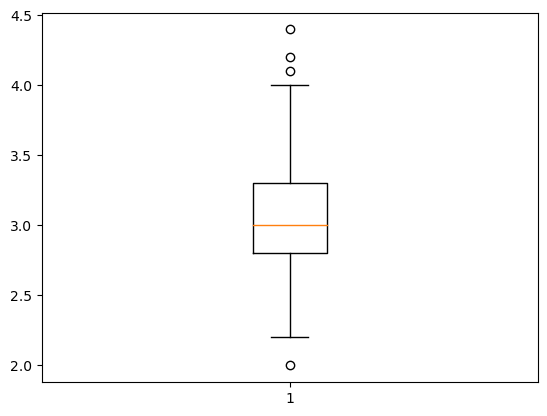

In [17]:
plt.boxplot(data['sepal_width'])

In [11]:
q3=data['sepal_width'].quantile(0.75)
q1=data['sepal_width'].quantile(0.25)

In [12]:
IQR=q3-q1

In [16]:
data=data[(data['sepal_width']>(q1-1.5*IQR)) | (data['sepal_width']<(q3+1.5*IQR))]

In [18]:
x=data[['sepal_length','sepal_width','petal_length','petal_width']]

In [46]:
y=data[['species']]

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [48]:
lor=LogisticRegression()

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,train_size=0.8)

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le=LabelEncoder()

In [52]:
data['species']=le.fit_transform(data['species'])

In [53]:
lor.fit(x_train,y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [56]:
y_pred=lor.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score

In [59]:
ac=accuracy_score(y_test,y_pred)

In [60]:
ac

0.9666666666666667